In [9]:
!pip install tensorflow opencv-python numpy matplotlib

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
# Dataset configuration
data_dir = r"C:\dataset_blood_group" # Replace with your dataset path
categories = ['A+', 'B+', 'O+', 'AB+', 'A-', 'B-', 'O-', 'AB-']
img_size = 128  # Resize all images to 128x128

# Preprocessing function
def preprocess_data(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                img = cv2.resize(img, (img_size, img_size))
                data.append([img, label])
            except Exception as e:
                print(f"Error processing image {img_name}: {e}")
    return data

# Load data
data = preprocess_data(data_dir, categories, img_size)
np.random.shuffle(data)

# Split features and labels
X, y = zip(*data)
X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # Normalize
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shape
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4800, 128, 128, 1)
Testing set shape: (1200, 128, 128, 1)


In [29]:
# Model configuration
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 346ms/step - accuracy: 0.3237 - loss: 1.8296 - val_accuracy: 0.8175 - val_loss: 0.6248
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 341ms/step - accuracy: 0.7121 - loss: 0.7826 - val_accuracy: 0.8283 - val_loss: 0.4696
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.7731 - loss: 0.6304 - val_accuracy: 0.8417 - val_loss: 0.3923
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 345ms/step - accuracy: 0.7987 - loss: 0.5556 - val_accuracy: 0.8508 - val_loss: 0.3724
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 363ms/step - accuracy: 0.8191 - loss: 0.4812 - val_accuracy: 0.8492 - val_loss: 0.3554
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 53s 355ms/step - accuracy: 0.8389 - loss: 0.4434 - val_accuracy: 0.8767 - val_loss: 0.3096
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 361ms/step - accuracy: 0.8627 - loss: 0.3724 - val_accuracy: 0.8783 - val_loss: 0.3121
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 356ms/step - accuracy: 0.8742 - loss: 0

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8579 - loss: 0.3944
Test Accuracy: 87.58%


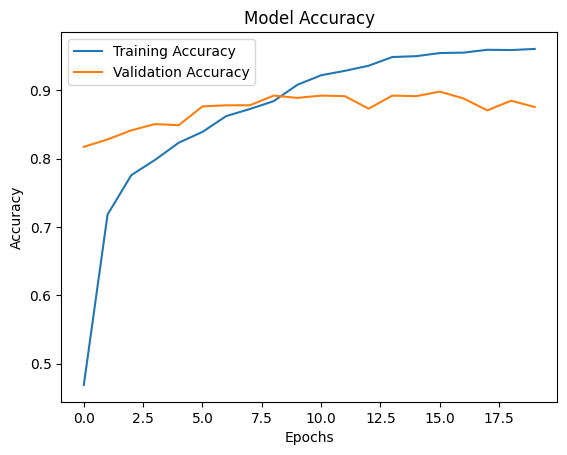

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [33]:
# Test with a new image
def predict_blood_group(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img.reshape(1, img_size, img_size, 1) / 255.0
    prediction = model.predict(img)
    return categories[np.argmax(prediction)]

# Example usage
test_image_path = r"C:\dataset_blood_group\O-\cluster_7_21.BMP"  # Replace with a valid test image path
predicted_blood_group = predict_blood_group(test_image_path)
print(f"Predicted Blood Group: {predicted_blood_group}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted Blood Group: O-


In [35]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.8579 - loss: 0.3944
Test Accuracy: 87.58%


In [37]:
# Save the trained model
model.save("blood_group_model.h5")
print("Model saved as blood_group_cnn_model.h5")

Model saved as blood_group_cnn_model.h5
